In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("../app/dataset/telco-customer-churn.csv")

In [3]:
num_columns = df.select_dtypes(include=np.number).columns

In [5]:
num_columns[0]

'SeniorCitizen'

In [7]:
df.values

array([['7590-VHVEG', 'Female', 0, ..., 29.85, '29.85', 'No'],
       ['5575-GNVDE', 'Male', 0, ..., 56.95, '1889.5', 'No'],
       ['3668-QPYBK', 'Male', 0, ..., 53.85, '108.15', 'Yes'],
       ...,
       ['4801-JZAZL', 'Female', 0, ..., 29.6, '346.45', 'No'],
       ['8361-LTMKD', 'Male', 1, ..., 74.4, '306.6', 'Yes'],
       ['3186-AJIEK', 'Male', 0, ..., 105.65, '6844.5', 'No']],
      shape=(7043, 21), dtype=object)

In [6]:
df[num_columns].head()

,SeniorCitizen,tenure,MonthlyCharges
0,0,1,29.85
1,0,34,56.95
2,0,2,53.85
3,0,45,42.30
4,0,2,70.70


In [7]:
a = df.head(1)

In [8]:
a

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Churn by Gender (Counts)')

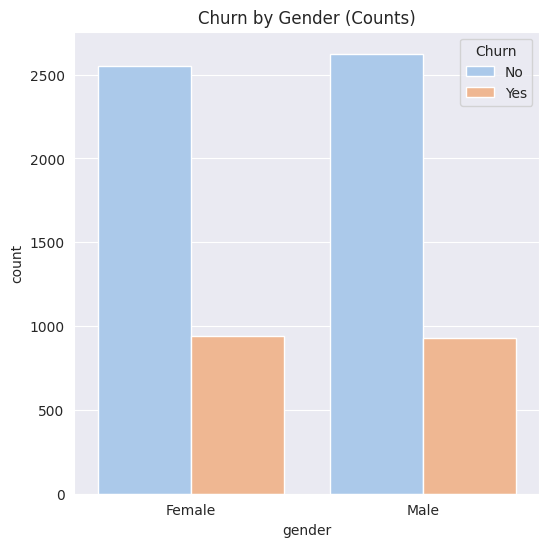

In [7]:
f, ax = plt.subplots(figsize=(6, 6))
sns.countplot(x="gender", hue="Churn", data=df, palette="pastel", ax=ax)
ax.set_title("Churn by Gender (Counts)")

In [8]:
df["Churn"].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [9]:
df["gender"].value_counts()

gender
Male      3555
Female    3488
Name: count, dtype: int64

In [10]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


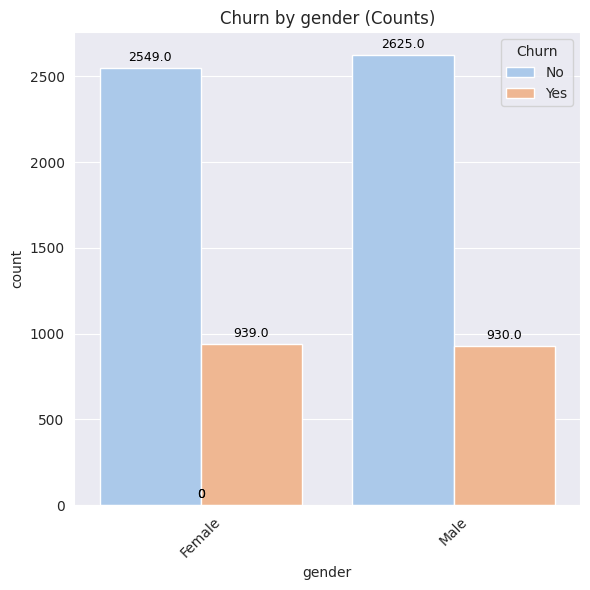

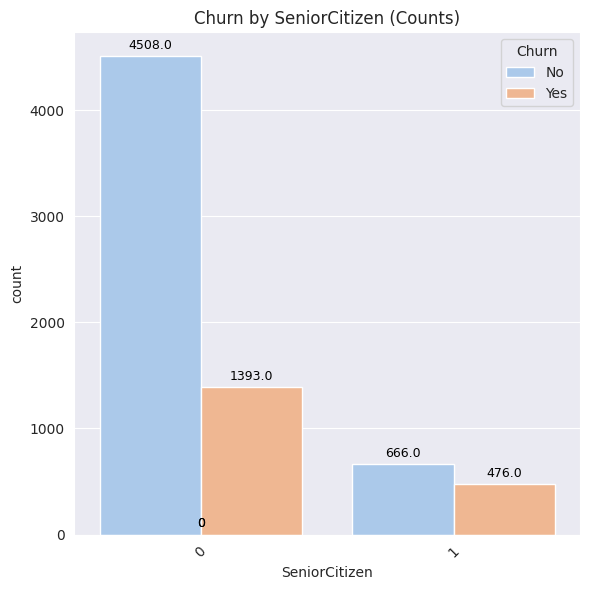

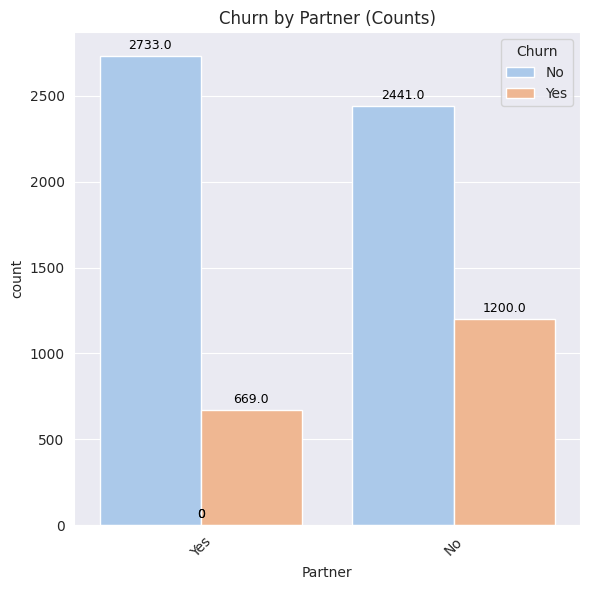

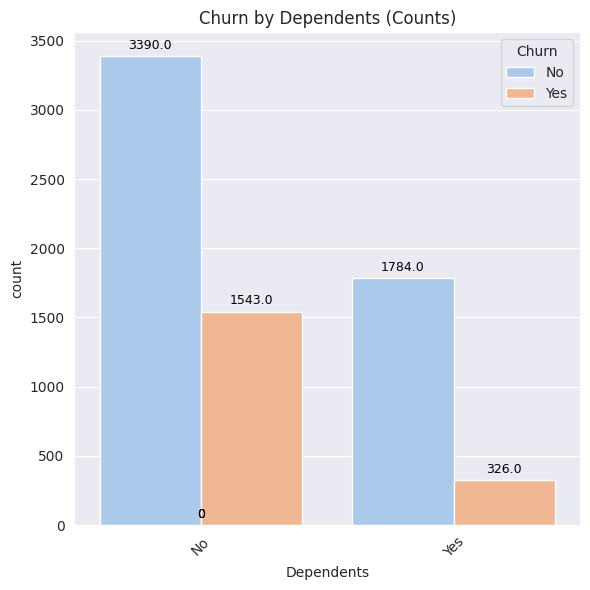

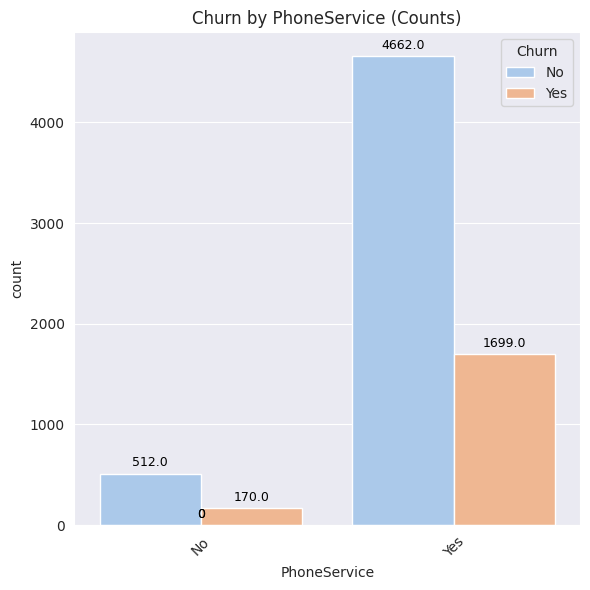

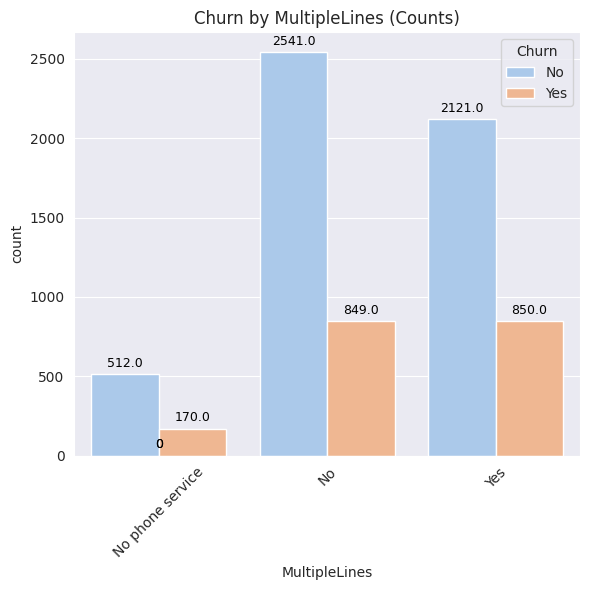

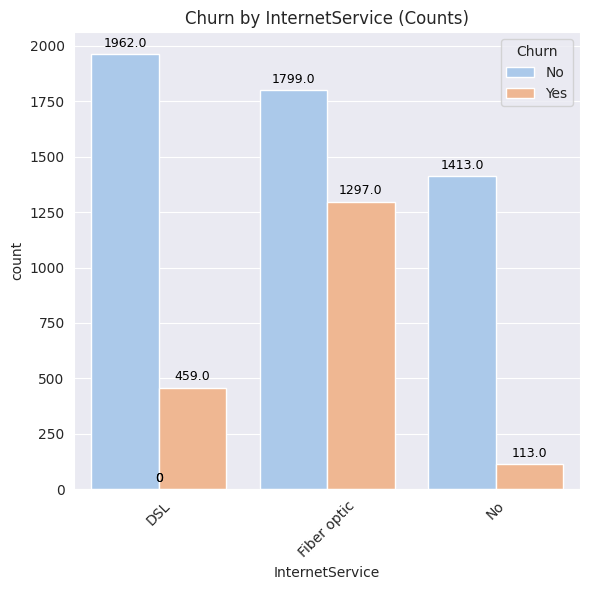

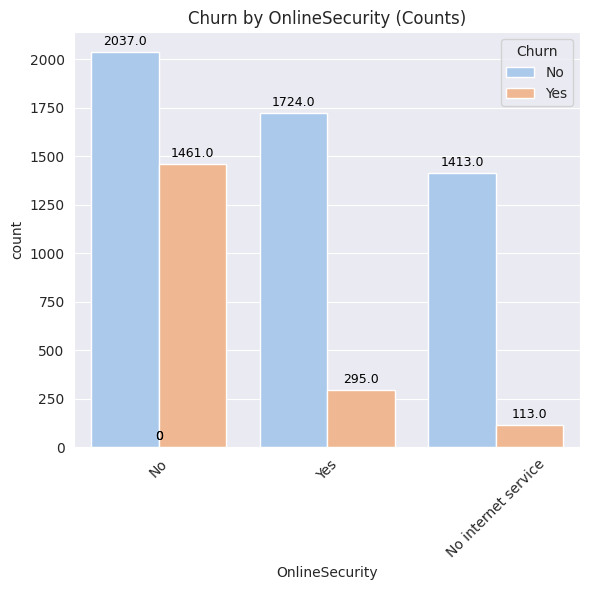

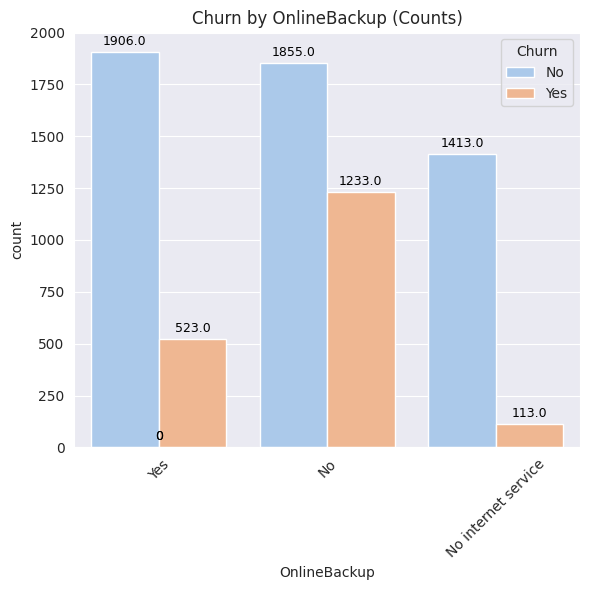

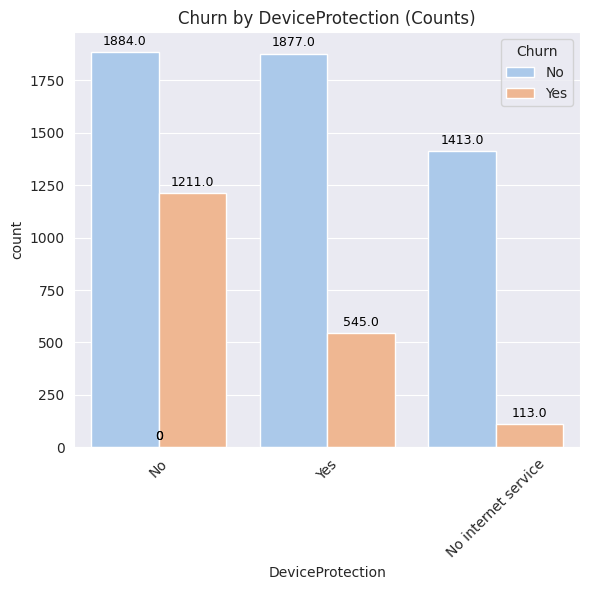

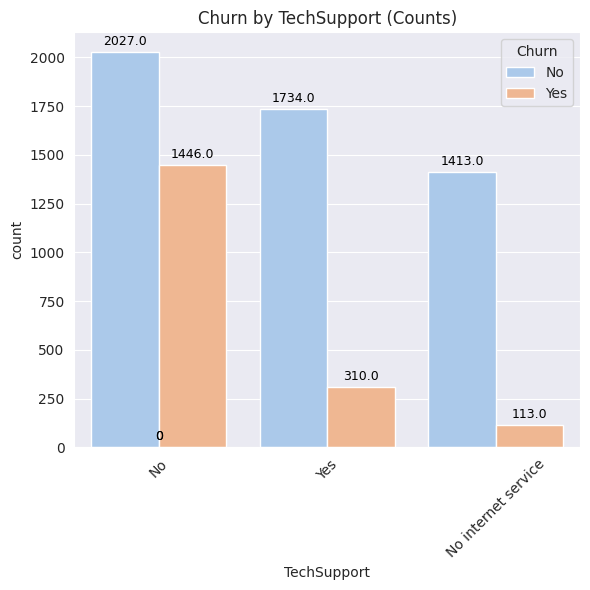

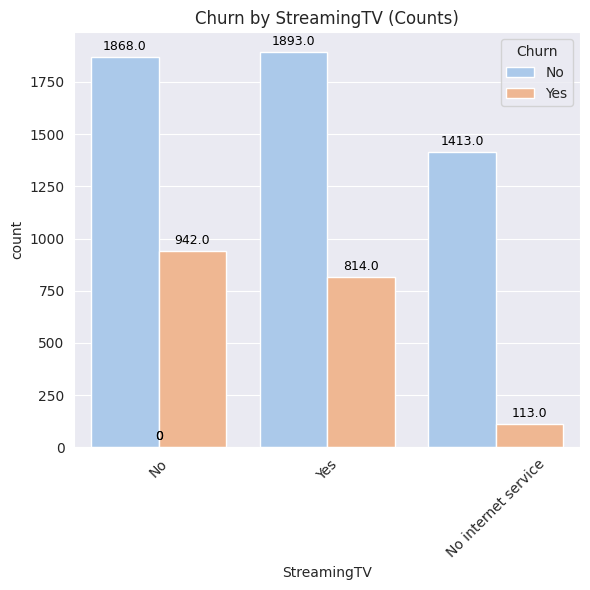

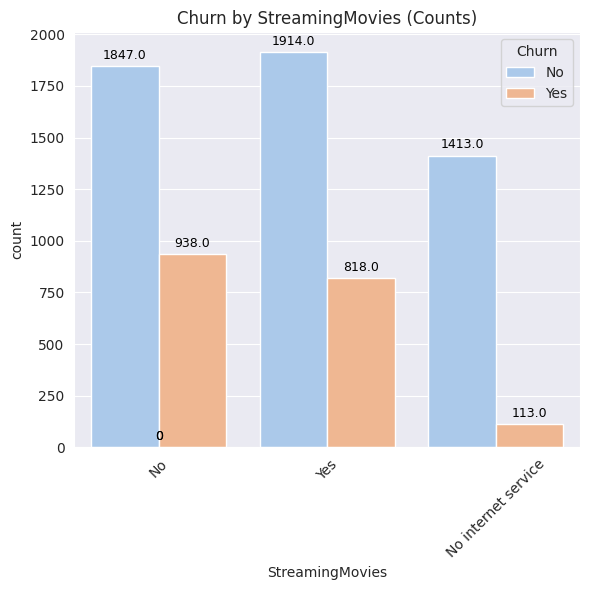

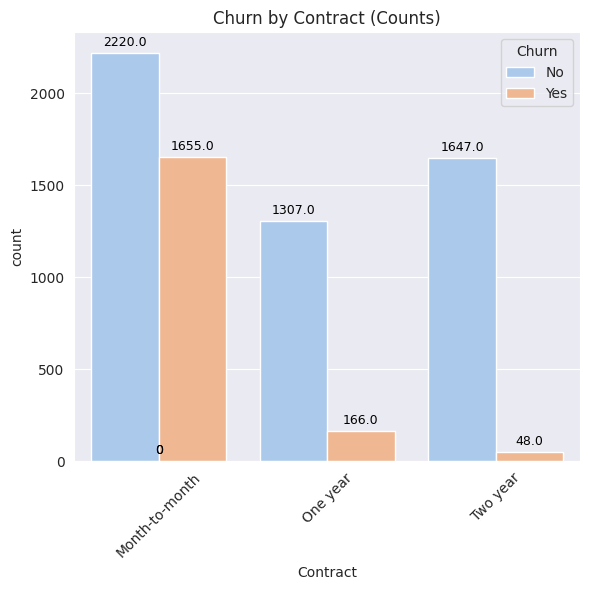

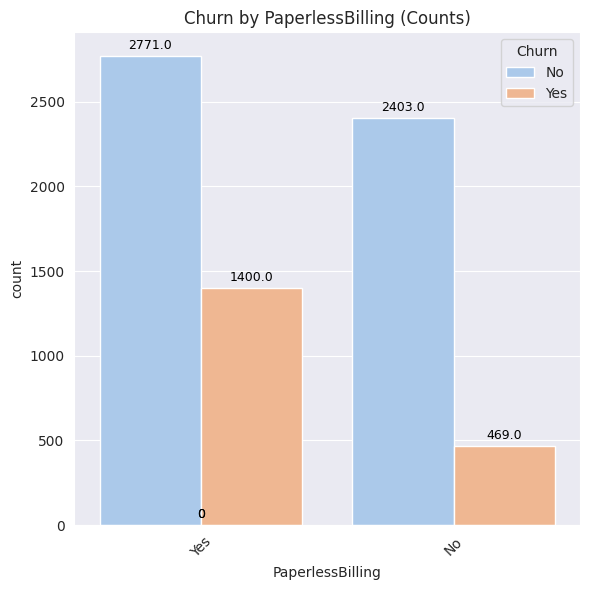

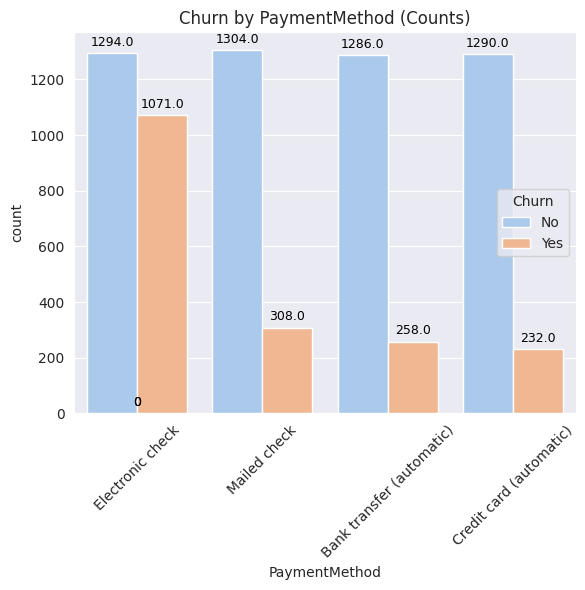

In [12]:
for col in df.columns:
    if col in ["tenure", "customerID", "MonthlyCharges", "TotalCharges", "Churn"]:
        continue
    f, ax = plt.subplots(figsize=(6, 6))
    sns.countplot(x=col, hue="Churn", data=df, palette="pastel", ax=ax)
    ax.set_title(f"Churn by {col} (Counts)")

    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height}',
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', fontsize=9, color='black', xytext=(0, 3),
                    textcoords='offset points')
    plt.xticks(rotation=45)  # rotate x labels for readability
    plt.tight_layout()
    plt.show()


- gender does not matter
- senior citizen evenly distributed
- if no dependents, more likely to churn
- internet service has affect on churn (fiber optic service user more likely churned, indicates problems)
- online security with no churned more, indicates there is not enough awareness for it
- no to online backup churned more,
- no to device protection churned more
- no to tech-support churned more
- streaming-tv, streaming-movies barely makes difference
- customer with month-to-month contract churned more
- customer with paperless-billing, electronic-check churned more

In [13]:
df["Churn"].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [14]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [15]:
values = df["InternetService"].value_counts()
labels = df["InternetService"].unique()

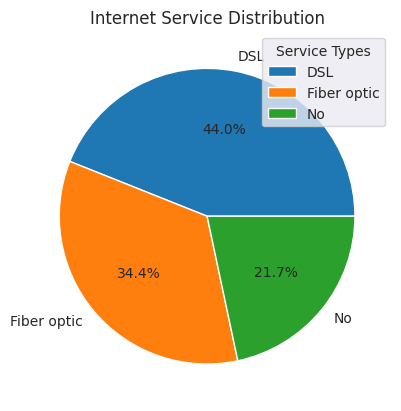

In [16]:
plt.pie(x=values, labels=labels, autopct='%1.1f%%')
plt.title("Internet Service Distribution")
plt.legend(title="Service Types", loc=1)
plt.show()

In [17]:
churned = df[df["Churn"] == "Yes"]

In [18]:
churned.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
13,0280-XJGEX,Male,0,No,No,49,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes


In [19]:
values = churned["InternetService"].value_counts()

In [20]:
labels = values.index

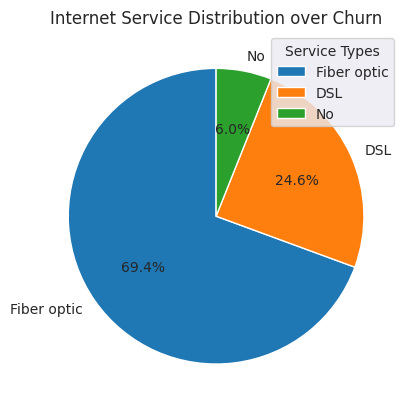

In [21]:
plt.pie(
    x=values,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90
)
plt.title("Internet Service Distribution over Churn")
plt.legend(loc="upper right", title="Service Types")
plt.show()

In [22]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [23]:
important_columns = ["Dependents", "PhoneService","InternetService", "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "Contract", "PaperlessBilling", "PaymentMethod"]

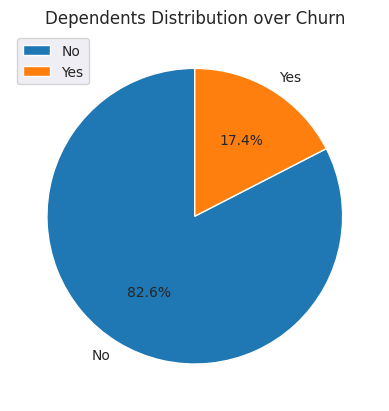

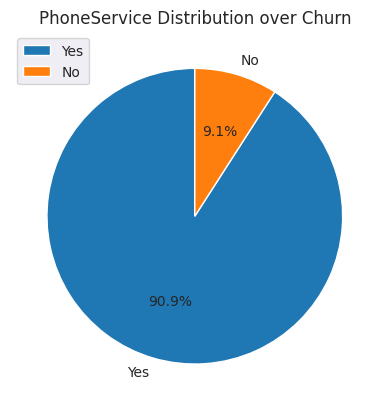

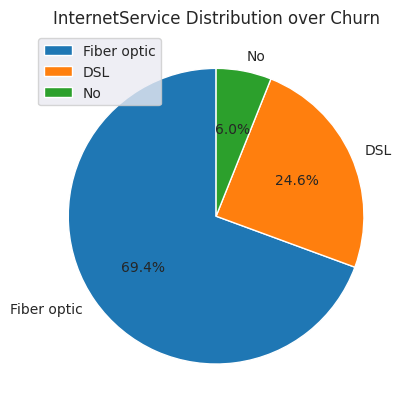

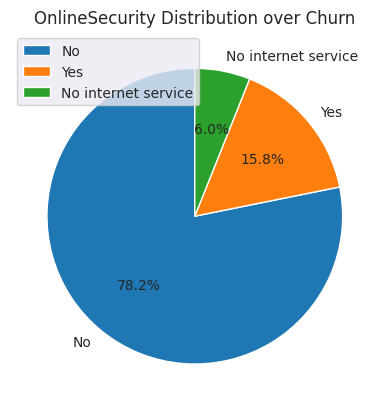

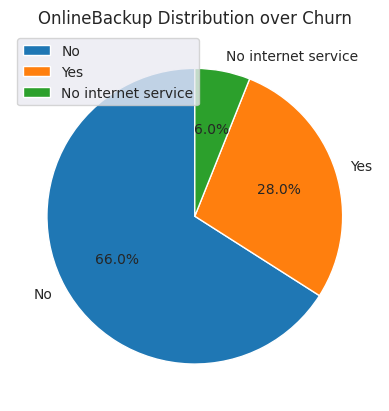

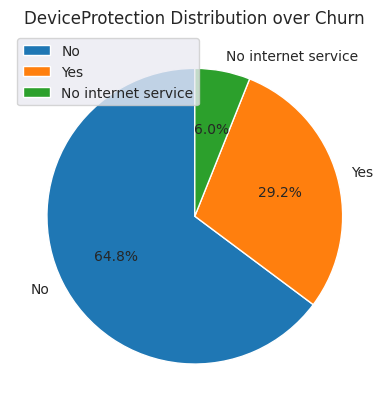

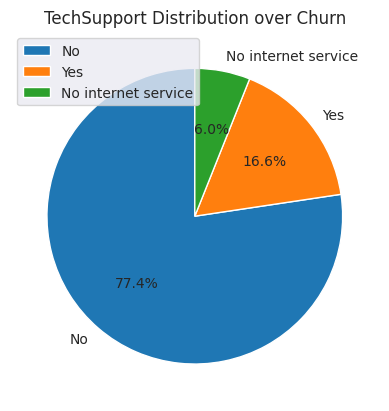

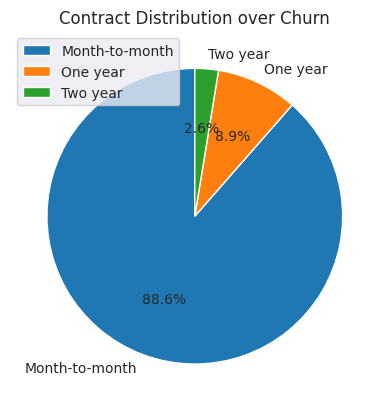

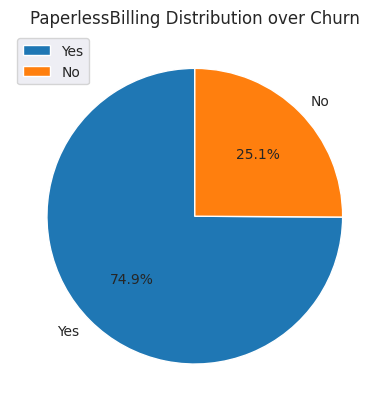

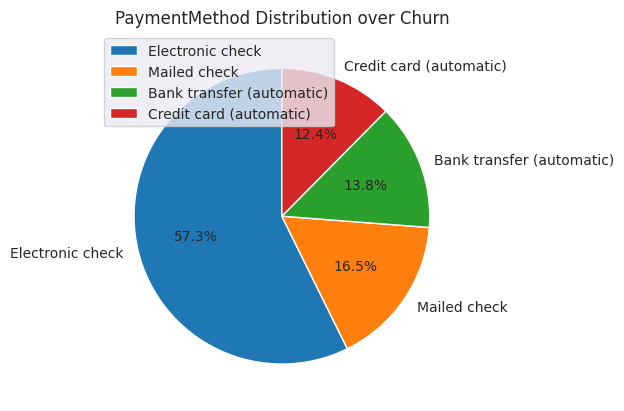

In [24]:
for col in important_columns:
    values = churned[col].value_counts()
    labels = values.index

    plt.pie(
        x=values,
        labels=labels,
        autopct='%1.1f%%',
        startangle=90
    )
    plt.title(f"{col} Distribution over Churn")
    plt.legend(loc="upper left")
    plt.show()


In [25]:
not_churned = df[df["Churn"] == "No"]

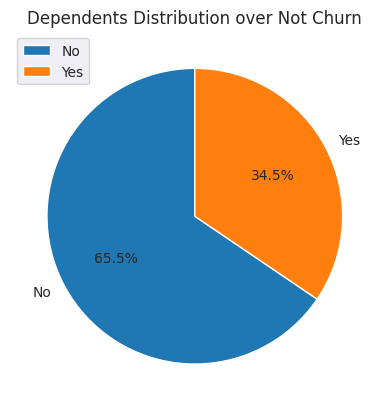

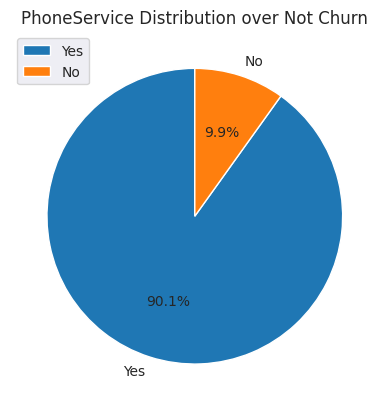

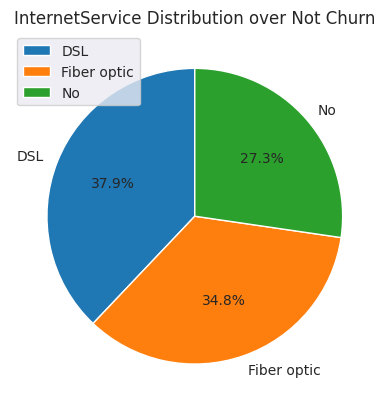

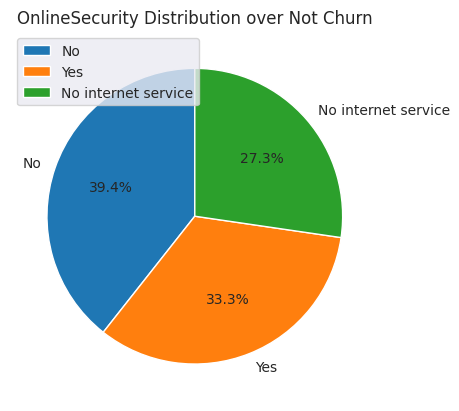

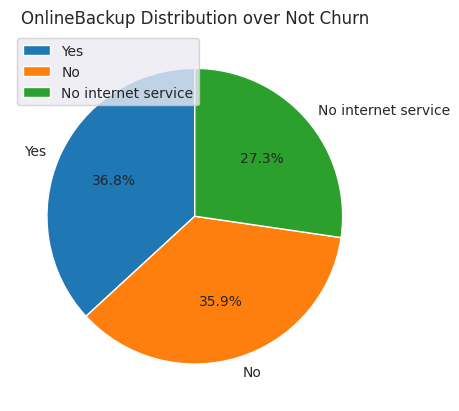

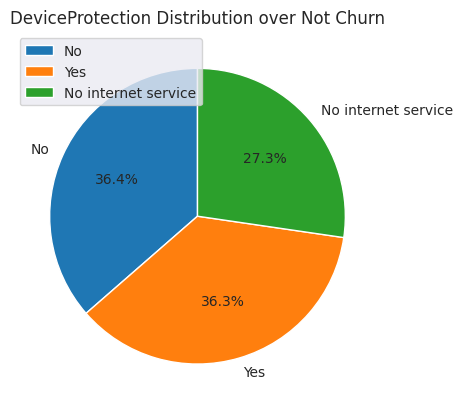

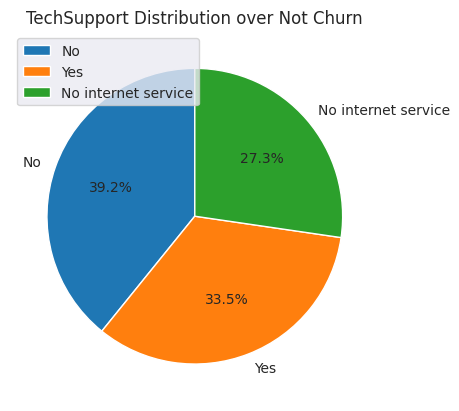

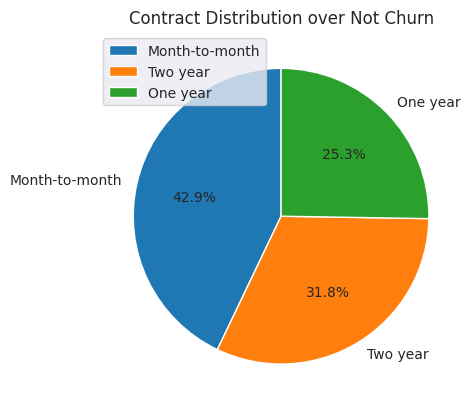

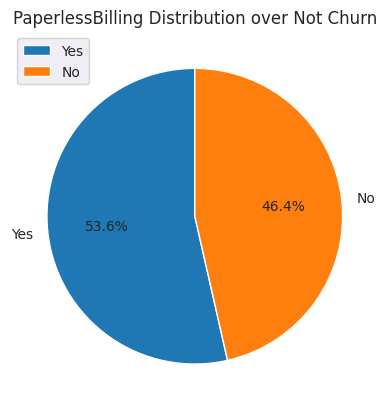

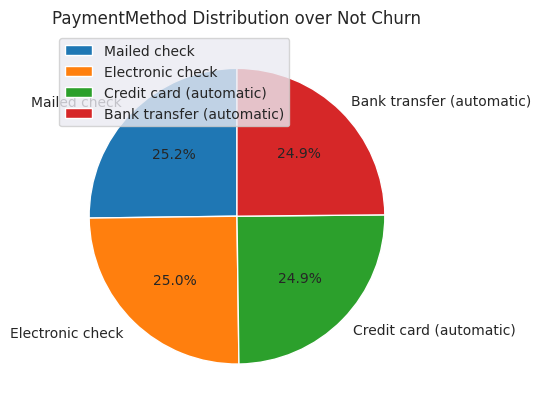

In [26]:
for col in important_columns:
    values = not_churned[col].value_counts()
    labels = values.index

    plt.pie(
        x=values,
        labels=labels,
        autopct='%1.1f%%',
        startangle=90
    )
    plt.title(f"{col} Distribution over Not Churn")
    plt.legend(loc="upper left")
    plt.show()


In [27]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [30]:
num_columns = ["tenure", "MonthlyCharges", "TotalCharges"]

In [7]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

In [8]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [9]:
df = df.dropna(subset=["TotalCharges"])

In [10]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [34]:
num_columns

['tenure', 'MonthlyCharges', 'TotalCharges']

In [35]:
for col in df.columns:
    if col in num_columns:
        df[col].describe()

In [36]:
df["tenure"].describe()

count    7032.000000
mean       32.421786
std        24.545260
min         1.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64

In [11]:
churn_map = {
    "No": 0,
    "Yes": 1,
}

In [12]:
df["Churn"] = df["Churn"].map(churn_map)

In [39]:
df["Churn"].value_counts()

Churn
0    5163
1    1869
Name: count, dtype: int64

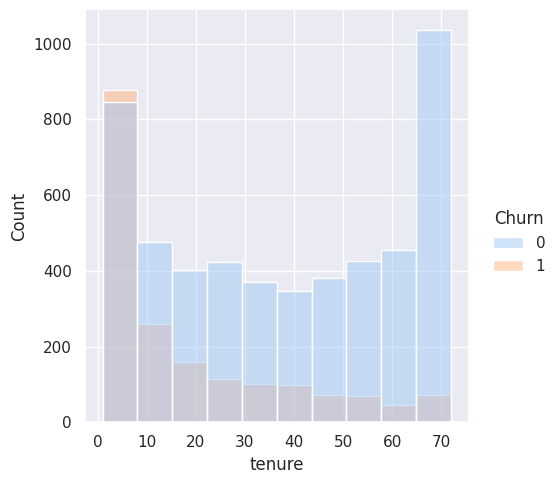

In [40]:
sns.set_theme(style="darkgrid")
sns.displot(
    x="tenure", hue="Churn", data=df, bins=10, palette="pastel"
)

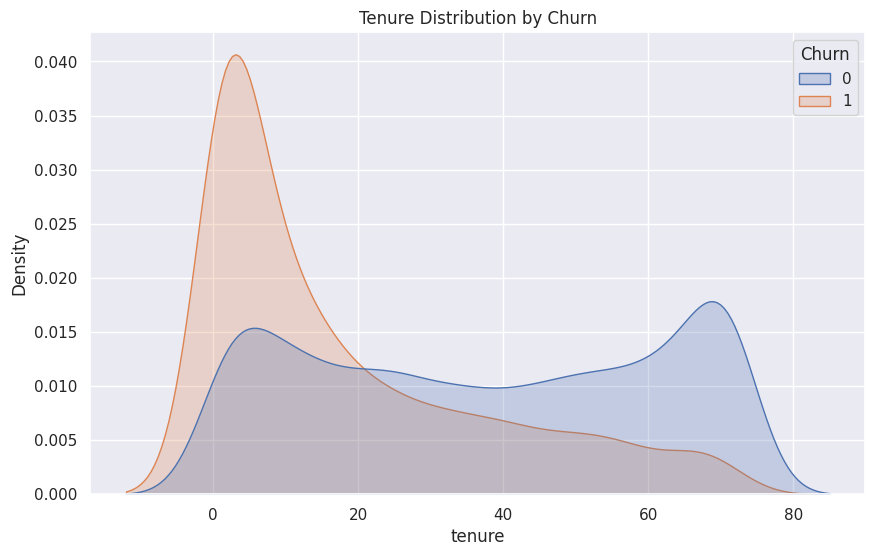

In [41]:
plt.figure(figsize=(10,6))
sns.kdeplot(data=df, x="tenure", hue="Churn", fill=True, common_norm=False)
plt.title("Tenure Distribution by Churn")
plt.show()

In [42]:
df["TotalCharges"].head()

0      29.85
1    1889.50
2     108.15
3    1840.75
4     151.65
Name: TotalCharges, dtype: float64

In [43]:
df["TotalCharges"].describe()

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64

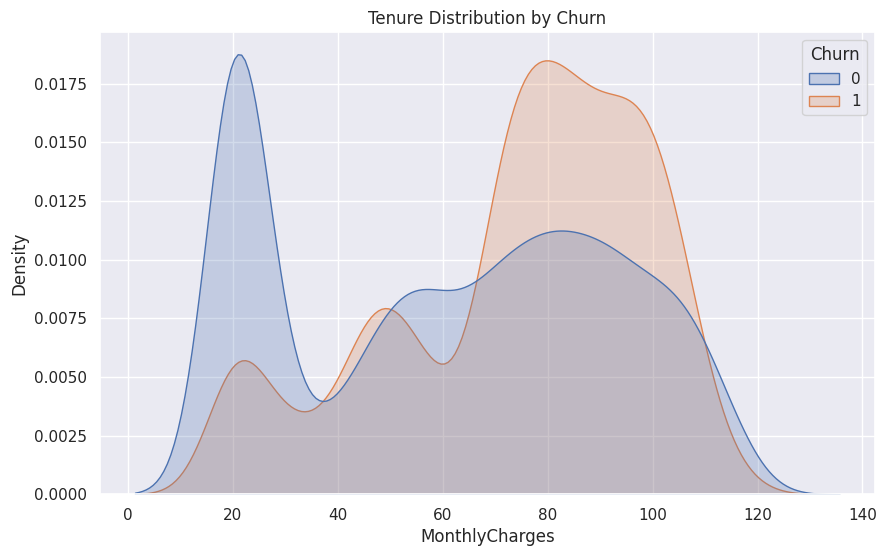

In [44]:
plt.figure(figsize=(10,6))
sns.kdeplot(data=df, x="MonthlyCharges", hue="Churn", fill=True, common_norm=False)
plt.title("Tenure Distribution by Churn")
plt.show()

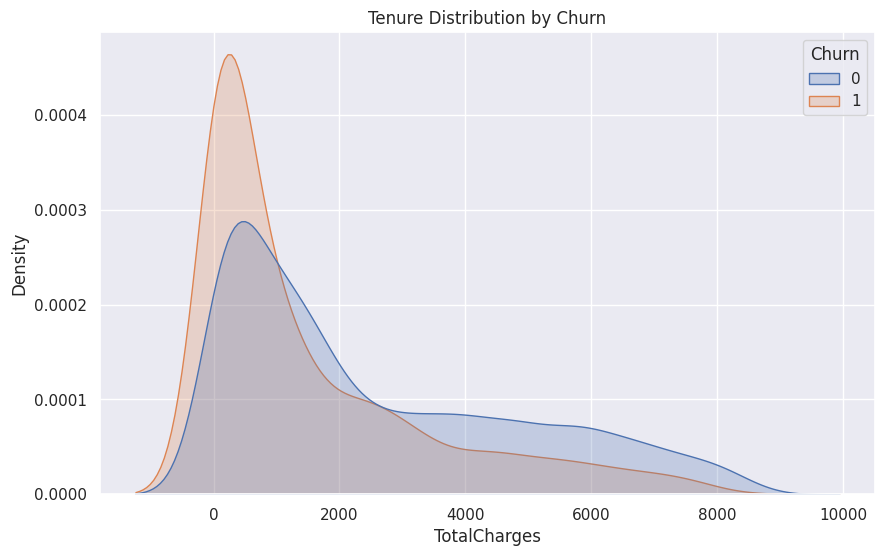

In [45]:
plt.figure(figsize=(10,6))
sns.kdeplot(data=df, x="TotalCharges", hue="Churn", fill=True, common_norm=False)
plt.title("Tenure Distribution by Churn")
plt.show()

In [15]:
obj_columns = df.select_dtypes(include=["object"]).columns
print(obj_columns)

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')


In [ ]:
df = df.drop("customerID", axis=1)

In [17]:
for col in obj_columns:
    print(df[col].value_counts())

gender
Male      3549
Female    3483
Name: count, dtype: int64
Partner
No     3639
Yes    3393
Name: count, dtype: int64
Dependents
No     4933
Yes    2099
Name: count, dtype: int64
PhoneService
Yes    6352
No      680
Name: count, dtype: int64
MultipleLines
No                  3385
Yes                 2967
No phone service     680
Name: count, dtype: int64
InternetService
Fiber optic    3096
DSL            2416
No             1520
Name: count, dtype: int64
OnlineSecurity
No                     3497
Yes                    2015
No internet service    1520
Name: count, dtype: int64
OnlineBackup
No                     3087
Yes                    2425
No internet service    1520
Name: count, dtype: int64
DeviceProtection
No                     3094
Yes                    2418
No internet service    1520
Name: count, dtype: int64
TechSupport
No                     3472
Yes                    2040
No internet service    1520
Name: count, dtype: int64
StreamingTV
No                     2809
Y

In [4]:
backup = df.copy()

In [5]:
df = backup.copy()

In [7]:
binary_cols = ["Partner", "Dependents", "PhoneService", "PaperlessBilling"]
service_cols = ["MultipleLines", "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies"]
multi_cols = ["gender", "InternetService", "Contract", "PaymentMethod"]

In [8]:
df[binary_cols] = df[binary_cols].apply(lambda x: x.map({"Yes":1, "No":0}))

In [9]:
df[service_cols] = df[service_cols].apply(lambda x: x.map({"Yes":1, "No":0, "No internet service": 0, "No phone service": 0}))

In [10]:
df = pd.get_dummies(df, columns=multi_cols, dtype=np.int8)  # drop_first avoids multicollinearity

In [11]:
df.head()

,customerID,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,1,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,5575-GNVDE,0,0,0,34,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,3668-QPYBK,0,0,0,2,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,7795-CFOCW,0,0,0,45,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,9237-HQITU,0,0,0,2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [13]:
df.columns = [col.replace(" ", "_").replace("(", "").replace(")", "") for col in df.columns]

In [17]:
backup["InternetService"].value_counts()

InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

In [18]:
backup.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [16]:
backup.head(20)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [14]:
df.columns

Index(['customerID', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'gender_Female', 'gender_Male', 'InternetService_DSL',
       'InternetService_Fiber_optic', 'InternetService_No',
       'Contract_Month-to-month', 'Contract_One_year', 'Contract_Two_year',
       'PaymentMethod_Bank_transfer_automatic',
       'PaymentMethod_Credit_card_automatic', 'PaymentMethod_Electronic_check',
       'PaymentMethod_Mailed_check'],
      dtype='object')

In [25]:
df.isnull().sum()

SeniorCitizen                            0
Partner                                  0
Dependents                               0
tenure                                   0
PhoneService                             0
MultipleLines                            0
OnlineSecurity                           0
OnlineBackup                             0
DeviceProtection                         0
TechSupport                              0
StreamingTV                              0
StreamingMovies                          0
PaperlessBilling                         0
MonthlyCharges                           0
TotalCharges                             0
Churn                                    0
gender_Male                              0
InternetService_Fiber optic              0
InternetService_No                       0
Contract_One year                        0
Contract_Two year                        0
PaymentMethod_Credit card (automatic)    0
PaymentMethod_Electronic check           0
PaymentMeth

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          7032 non-null   int64  
 1   Partner                                7032 non-null   int64  
 2   Dependents                             7032 non-null   int64  
 3   tenure                                 7032 non-null   int64  
 4   PhoneService                           7032 non-null   int64  
 5   MultipleLines                          7032 non-null   int64  
 6   OnlineSecurity                         7032 non-null   int64  
 7   OnlineBackup                           7032 non-null   int64  
 8   DeviceProtection                       7032 non-null   int64  
 9   TechSupport                            7032 non-null   int64  
 10  StreamingTV                            7032 non-null   int64  
 11  Streaming

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
from sklearn.preprocessing import StandardScaler

In [31]:
num_columns

['tenure', 'MonthlyCharges', 'TotalCharges']

In [32]:
X = df.drop("Churn", axis=1)
y = df["Churn"]

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [34]:
scaler = StandardScaler()

In [35]:
X_train[num_columns] = scaler.fit_transform(X_train[num_columns])
X_test[num_columns] = scaler.transform(X_test[num_columns])

In [64]:
X_train["TotalCharges"].describe()

count    5.274000e+03
mean    -2.425061e-17
std      1.000095e+00
min     -9.978222e-01
25%     -8.291231e-01
50%     -3.924126e-01
75%      6.620981e-01
max      2.837022e+00
Name: TotalCharges, dtype: float64

In [36]:
from dotenv import load_dotenv

In [37]:
load_dotenv(dotenv_path="../.env")

True

In [38]:
import os

In [39]:
import wandb

In [40]:
os.environ["WANDB_API_KEY"] = os.getenv("WANDB_API_KEY")

In [41]:
from sklearn.metrics import classification_report, confusion_matrix

In [42]:
def print_metrics(y_test_, y_pred, model_name):
    print(classification_report(y_test_, y_pred))
    print("-------------------------------------------------")
    sns.heatmap(confusion_matrix(y_test_, y_pred), annot=True, fmt="d", linewidths=.5) # y-axis true values, x-axis prediction values
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"{model_name} Confusion Matrix")
    plt.xticks(rotation=45)
    plt.show()

In [43]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [44]:
def prediction_and_log(model, X_train_, X_test_, y_train_, y_test_, project_name, config_, run_name):
    model.fit(X_train_, y_train_)
    y_pred = model.predict(X_test_)
    accuracy = accuracy_score(y_test_, y_pred)
    precision = precision_score(y_test_, y_pred)
    recall = recall_score(y_test_, y_pred)
    f1 = f1_score(y_test_, y_pred)

    with wandb.init(project=project_name, name= run_name, config=config_) as run:

        run.log({
            "Accuracy": accuracy,
            "Precision": precision,
            "Recall": recall,
            "F1": f1,
        })

    print_metrics(y_test_=y_test_, y_pred=y_pred, model_name=config_["model_name"])


Accuracy,▁
F1,▁
Precision,▁
Recall,▁
Accuracy,0.77702
F1,0.52542
Precision,0.58967
Recall,0.4738


              precision    recall  f1-score   support

           0       0.83      0.88      0.85      1300
           1       0.59      0.47      0.53       458

    accuracy                           0.78      1758
   macro avg       0.71      0.68      0.69      1758
weighted avg       0.76      0.78      0.77      1758

-------------------------------------------------


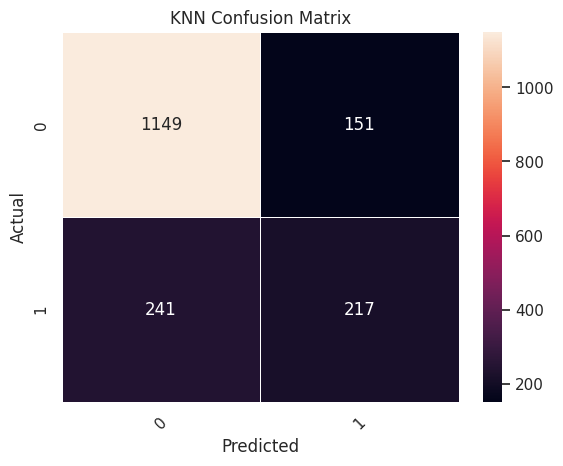

In [92]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(
    n_neighbors=10,
)

config={
    "model_name": "KNN",
    "n_neighbors": 10,
}

prediction_and_log(knn, X_train, X_test, y_train, y_test, "customer-churn", config, config["model_name"])

aa- True negative / False positive
- False negative / True positive

## KNN Performs well for identifying negative values, not good at identifying positives
- Low recall score (%47 for my run)

In [86]:
from sklearn.tree import DecisionTreeClassifier

Accuracy,▁
F1,▁
Precision,▁
Recall,▁
Accuracy,0.77645
F1,0.50441
Precision,0.59701
Recall,0.43668


              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1300
           1       0.60      0.44      0.50       458

    accuracy                           0.78      1758
   macro avg       0.71      0.67      0.68      1758
weighted avg       0.76      0.78      0.76      1758

-------------------------------------------------


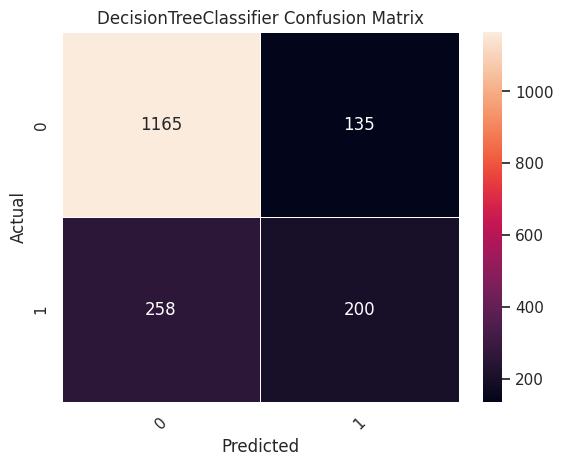

In [91]:
dt = DecisionTreeClassifier(
    max_depth=6,
    min_samples_split=10,
)

config = {
    "model_name": "DecisionTreeClassifier",
    "max_depth": 6,
    "min_samples_split": 10,
}

prediction_and_log(dt, X_train, X_test, y_train, y_test, "customer-churn", config, config["model_name"])

Accuracy,▁
F1,▁
Precision,▁
Recall,▁
Accuracy,0.79181
F1,0.52094
Precision,0.65033
Recall,0.4345


              precision    recall  f1-score   support

           0       0.82      0.92      0.87      1300
           1       0.65      0.43      0.52       458

    accuracy                           0.79      1758
   macro avg       0.74      0.68      0.69      1758
weighted avg       0.78      0.79      0.78      1758

-------------------------------------------------


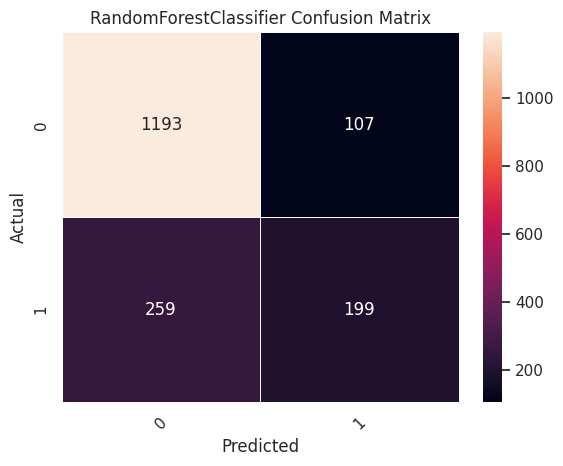

In [90]:
from sklearn.ensemble import RandomForestClassifier

rd = RandomForestClassifier(
    n_estimators=100,
    max_depth=6,
    min_samples_split=10,
    random_state=42,
)

config = {
    "model_name": "RandomForestClassifier",
    "n_estimators": 100,
    "max_depth": 6,
    "min_samples_split": 10,
    "random_state": 42,
}

prediction_and_log(rd, X_train, X_test, y_train, y_test, "customer-churn", config, config["model_name"])

In [ ]:
config = {
    "model_name": "RandomForestClassifier",
    "n_estimators": 100,
    "max_depth": 6,
    "min_samples_split": 10,
    "random_state": 42,
}

In [93]:
sweep_configuration = {
    "method": "random",
    "metric": {"goal": "minimize", "name": "Recall"},
    "parameters": {
        "n_estimators": {"max": 1000, "min": 100},
        "max_depth": {"max": 12, "min": 6},
        "min_samples_split": {"max": 500, "min": 50},
    },
}

In [94]:
def sweep_train(config_=None):
    with wandb.init(config=config_):
        config_of_model = wandb.config

        # create model from sweep parameters
        model = RandomForestClassifier(
            n_estimators=config_of_model.n_estimators,
            max_depth=config_of_model.max_depth,
            min_samples_split=config_of_model.min_samples_split,
            random_state=42,
        )

        # train + log
        prediction_and_log(
            model, X_train, X_test, y_train, y_test,
            project_name="customer-churn",
            config_=dict(config_of_model),
            run_name="RandomForest"
        )


Create sweep with ID: jxm8jegc
Sweep URL: https://wandb.ai/kirtan-bedirhan-ai/customer-churn/sweeps/jxm8jegc


wandb: Agent Starting Run: hp1llsz4 with config:
wandb: 	max_depth: 9
wandb: 	min_samples_split: 318
wandb: 	n_estimators: 175


Accuracy,▁
F1,▁
Precision,▁
Recall,▁
Accuracy,0.78441
F1,0.46088
Precision,0.66122
Recall,0.35371


              precision    recall  f1-score   support

           0       0.80      0.94      0.87      1300
           1       0.66      0.35      0.46       458

    accuracy                           0.78      1758
   macro avg       0.73      0.64      0.66      1758
weighted avg       0.77      0.78      0.76      1758

-------------------------------------------------


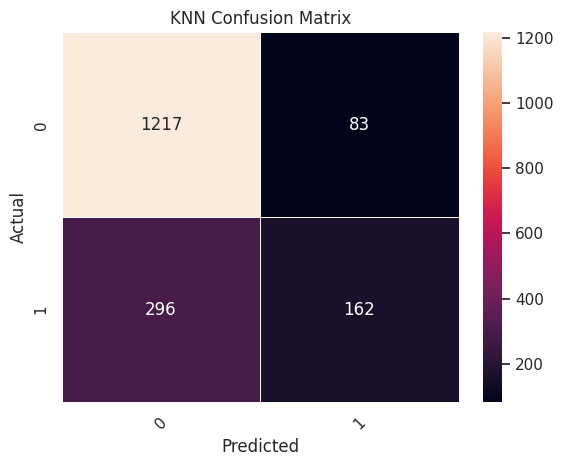

wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: lbkm740f with config:
wandb: 	max_depth: 7
wandb: 	min_samples_split: 150
wandb: 	n_estimators: 605


Accuracy,▁
F1,▁
Precision,▁
Recall,▁
Accuracy,0.79124
F1,0.51391
Precision,0.6532
Recall,0.42358


              precision    recall  f1-score   support

           0       0.82      0.92      0.87      1300
           1       0.65      0.42      0.51       458

    accuracy                           0.79      1758
   macro avg       0.74      0.67      0.69      1758
weighted avg       0.78      0.79      0.78      1758

-------------------------------------------------


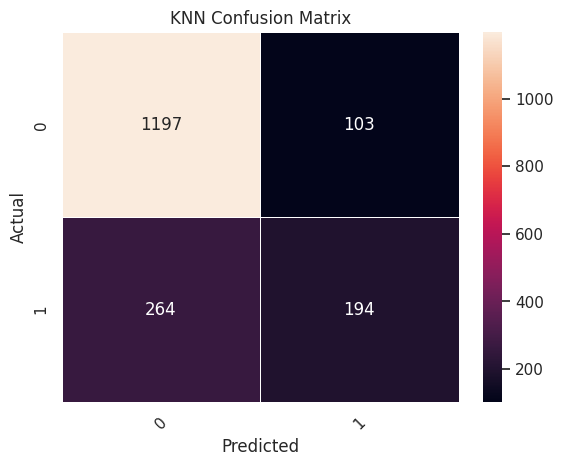

wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 57cy38id with config:
wandb: 	max_depth: 7
wandb: 	min_samples_split: 337
wandb: 	n_estimators: 755


Accuracy,▁
F1,▁
Precision,▁
Recall,▁
Accuracy,0.78441
F1,0.46088
Precision,0.66122
Recall,0.35371


              precision    recall  f1-score   support

           0       0.80      0.94      0.87      1300
           1       0.66      0.35      0.46       458

    accuracy                           0.78      1758
   macro avg       0.73      0.64      0.66      1758
weighted avg       0.77      0.78      0.76      1758

-------------------------------------------------


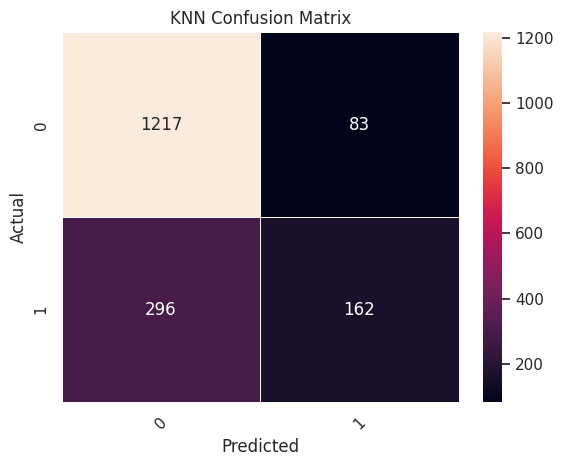

wandb: Agent Starting Run: dmig9pqt with config:
wandb: 	max_depth: 6
wandb: 	min_samples_split: 226
wandb: 	n_estimators: 901


Accuracy,▁
F1,▁
Precision,▁
Recall,▁
Accuracy,0.78896
F1,0.49248
Precision,0.65934
Recall,0.39301


              precision    recall  f1-score   support

           0       0.81      0.93      0.87      1300
           1       0.66      0.39      0.49       458

    accuracy                           0.79      1758
   macro avg       0.74      0.66      0.68      1758
weighted avg       0.77      0.79      0.77      1758

-------------------------------------------------


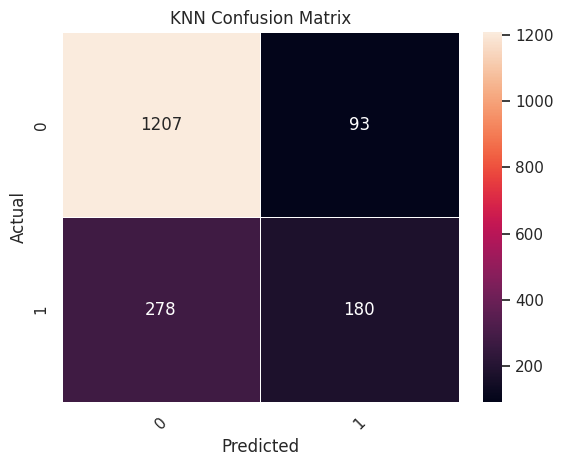

wandb: Agent Starting Run: z4io5ai5 with config:
wandb: 	max_depth: 7
wandb: 	min_samples_split: 374
wandb: 	n_estimators: 146


Accuracy,▁
F1,▁
Precision,▁
Recall,▁
Accuracy,0.78043
F1,0.44699
Precision,0.65
Recall,0.34061


              precision    recall  f1-score   support

           0       0.80      0.94      0.86      1300
           1       0.65      0.34      0.45       458

    accuracy                           0.78      1758
   macro avg       0.73      0.64      0.66      1758
weighted avg       0.76      0.78      0.75      1758

-------------------------------------------------


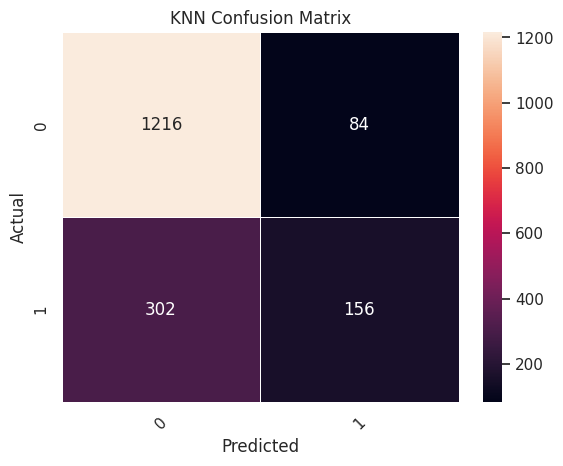

wandb: Agent Starting Run: 3iz7bnzz with config:
wandb: 	max_depth: 11
wandb: 	min_samples_split: 315
wandb: 	n_estimators: 387


Accuracy,▁
F1,▁
Precision,▁
Recall,▁
Accuracy,0.78441
F1,0.46393
Precision,0.65863
Recall,0.35808


              precision    recall  f1-score   support

           0       0.81      0.93      0.87      1300
           1       0.66      0.36      0.46       458

    accuracy                           0.78      1758
   macro avg       0.73      0.65      0.66      1758
weighted avg       0.77      0.78      0.76      1758

-------------------------------------------------


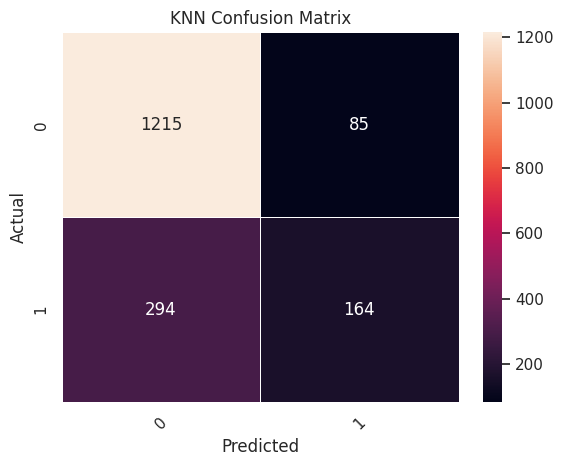

wandb: Agent Starting Run: 1mjxtq83 with config:
wandb: 	max_depth: 7
wandb: 	min_samples_split: 424
wandb: 	n_estimators: 346


Accuracy,▁
F1,▁
Precision,▁
Recall,▁
Accuracy,0.78157
F1,0.45143
Precision,0.65289
Recall,0.34498


              precision    recall  f1-score   support

           0       0.80      0.94      0.86      1300
           1       0.65      0.34      0.45       458

    accuracy                           0.78      1758
   macro avg       0.73      0.64      0.66      1758
weighted avg       0.76      0.78      0.76      1758

-------------------------------------------------


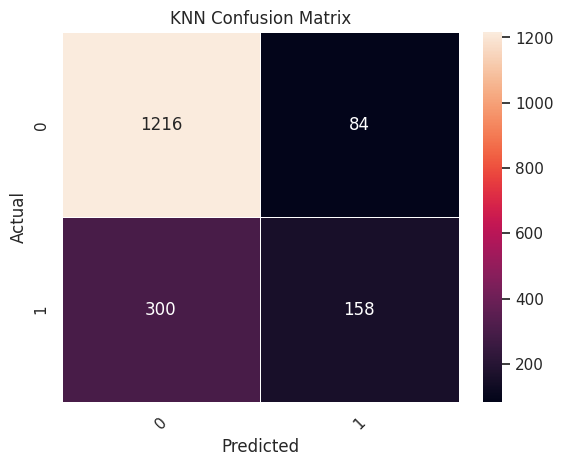

wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: xdv081sl with config:
wandb: 	max_depth: 8
wandb: 	min_samples_split: 159
wandb: 	n_estimators: 638


Accuracy,▁
F1,▁
Precision,▁
Recall,▁
Accuracy,0.79124
F1,0.51647
Precision,0.65116
Recall,0.42795


              precision    recall  f1-score   support

           0       0.82      0.92      0.87      1300
           1       0.65      0.43      0.52       458

    accuracy                           0.79      1758
   macro avg       0.74      0.67      0.69      1758
weighted avg       0.78      0.79      0.78      1758

-------------------------------------------------


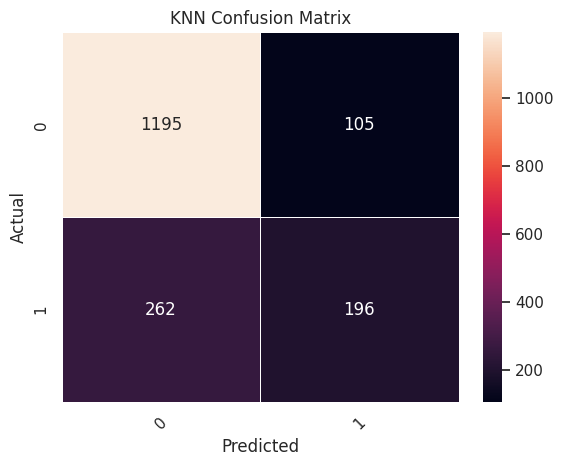

wandb: Agent Starting Run: 0d7ytg4t with config:
wandb: 	max_depth: 7
wandb: 	min_samples_split: 253
wandb: 	n_estimators: 784


Accuracy,▁
F1,▁
Precision,▁
Recall,▁
Accuracy,0.7901
F1,0.49659
Precision,0.66182
Recall,0.39738


              precision    recall  f1-score   support

           0       0.81      0.93      0.87      1300
           1       0.66      0.40      0.50       458

    accuracy                           0.79      1758
   macro avg       0.74      0.66      0.68      1758
weighted avg       0.77      0.79      0.77      1758

-------------------------------------------------


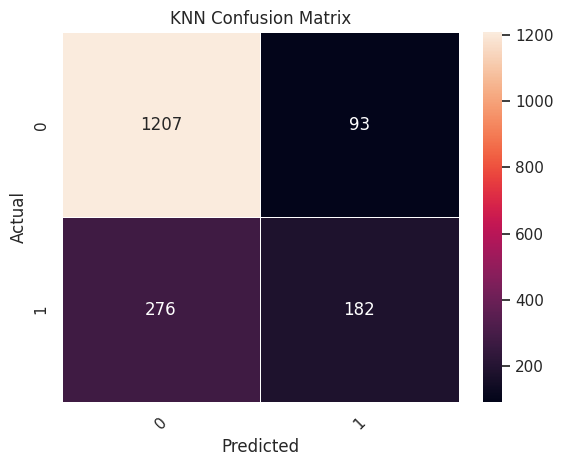

wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: ea8x9hqw with config:
wandb: 	max_depth: 11
wandb: 	min_samples_split: 399
wandb: 	n_estimators: 991


Accuracy,▁
F1,▁
Precision,▁
Recall,▁
Accuracy,0.78328
F1,0.45337
Precision,0.66109
Recall,0.34498


              precision    recall  f1-score   support

           0       0.80      0.94      0.86      1300
           1       0.66      0.34      0.45       458

    accuracy                           0.78      1758
   macro avg       0.73      0.64      0.66      1758
weighted avg       0.77      0.78      0.76      1758

-------------------------------------------------


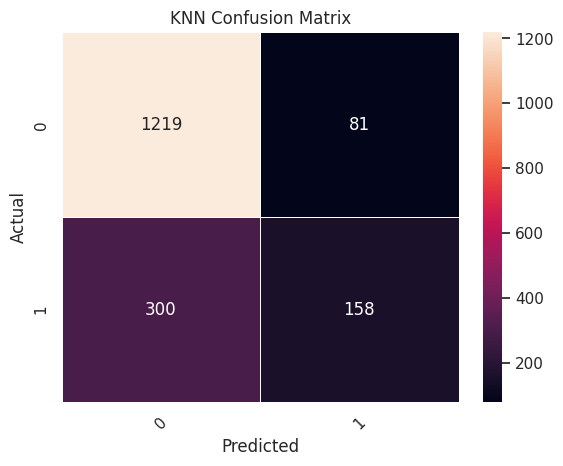

In [95]:
sweep_id = wandb.sweep(sweep_configuration, project="customer-churn")

wandb.agent(sweep_id, function=sweep_train, count=10)

In [45]:
from imblearn.over_sampling import SMOTE

In [47]:
df["Churn"].value_counts()

Churn
0    5163
1    1869
Name: count, dtype: int64

              precision    recall  f1-score   support

           0       0.83      0.88      0.85      1300
           1       0.59      0.47      0.53       458

    accuracy                           0.78      1758
   macro avg       0.71      0.68      0.69      1758
weighted avg       0.76      0.78      0.77      1758

-------------------------------------------------


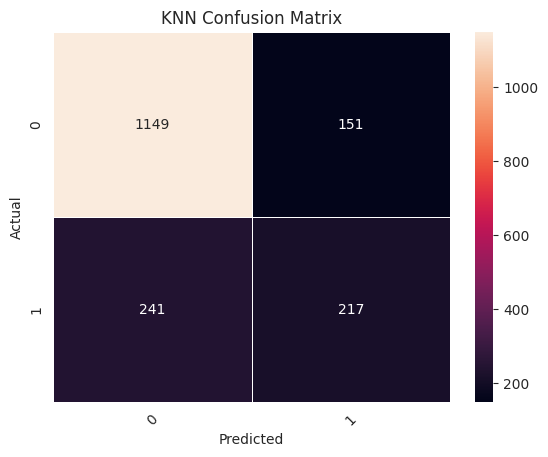

In [46]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(
    n_neighbors=10,
)

knn_config = {
    "model_name": "KNN",
    "n_neighbors": 10,
}

knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print_metrics(y_test_=y_test, y_pred=y_pred_knn, model_name=knn_config["model_name"])

In [48]:
from sklearn.model_selection import cross_val_score, StratifiedKFold


In [49]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scores = cross_val_score(knn, X_train, y_train, cv=cv, scoring="recall")

print("Cross-validation Recall scores:", scores)
print("Mean Recall:", scores.mean())

Cross-validation Recall scores: [0.5070922  0.4964539  0.4787234  0.48056537 0.53546099]
Mean Recall: 0.49965917349572714


In [50]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

pipeline = Pipeline([
    ("smote", SMOTE(random_state=42)),
    ("knn", KNeighborsClassifier(n_neighbors=10))
])

scores = cross_val_score(pipeline, X_train, y_train, cv=cv, scoring="recall")

print("Cross-validation Recall scores:", scores)
print("Mean Recall:", scores.mean())

Cross-validation Recall scores: [0.76241135 0.75531915 0.74468085 0.7385159  0.80141844]
Mean Recall: 0.7604691376588227


In [56]:
churn_values = df["Churn"].value_counts()

print(churn_values[1] / churn_values[0])

0.36199883788495063


In [59]:
np.linspace(0.4, 1.0, 8)

array([0.4       , 0.48571429, 0.57142857, 0.65714286, 0.74285714,
       0.82857143, 0.91428571, 1.        ])

Best params: {'smote__sampling_strategy': np.float64(1.0), 'knn__n_neighbors': 11}
Best CV score: 0.8065258251259303
              precision    recall  f1-score   support

           0       0.90      0.68      0.77      1300
           1       0.46      0.78      0.58       458

    accuracy                           0.70      1758
   macro avg       0.68      0.73      0.68      1758
weighted avg       0.78      0.70      0.72      1758

-------------------------------------------------


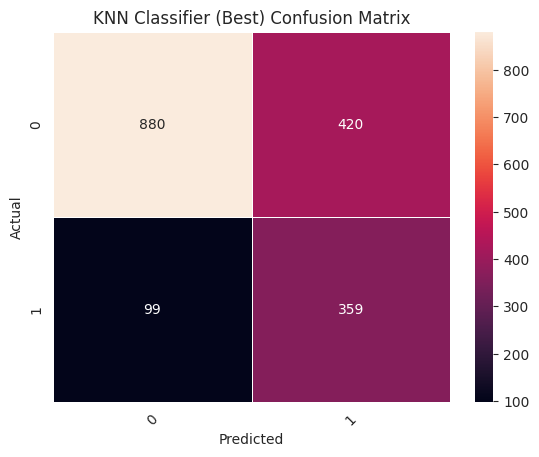

In [77]:
from sklearn.model_selection import RandomizedSearchCV

pipeline = Pipeline([
    ("smote", SMOTE(random_state=42)),
    ("knn", KNeighborsClassifier())
])

param_dist = {
    "smote__sampling_strategy": np.linspace(0.4, 1.0, 8),  # try ratios from 0.3 to 1.0
    "knn__n_neighbors": [3, 5, 7, 9, 11, 15]               # test multiple k values too
}

search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_dist,
    n_iter=20,               # sample 20 random combos
    scoring="recall",
    cv=cv,
    random_state=42,
    n_jobs=-1
)

search.fit(X_train, y_train)

print("Best params:", search.best_params_)
print("Best CV score:", search.best_score_)

best_model = search.best_estimator_
y_pred = best_model.predict(X_test)

print_metrics(y_test, y_pred, model_name="KNN Classifier (Best)")

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best params: {'smote__sampling_strategy': np.float64(1.0), 'random_forest__n_estimators': 1000, 'random_forest__min_samples_split': 20, 'random_forest__min_samples_leaf': 4, 'random_forest__max_features': 'log2', 'random_forest__max_depth': 8}
Best CV recall: 0.7668420920732777
              precision    recall  f1-score   support

           0       0.89      0.74      0.81      1300
           1       0.51      0.75      0.61       458

    accuracy                           0.75      1758
   macro avg       0.70      0.75      0.71      1758
weighted avg       0.79      0.75      0.76      1758

-------------------------------------------------


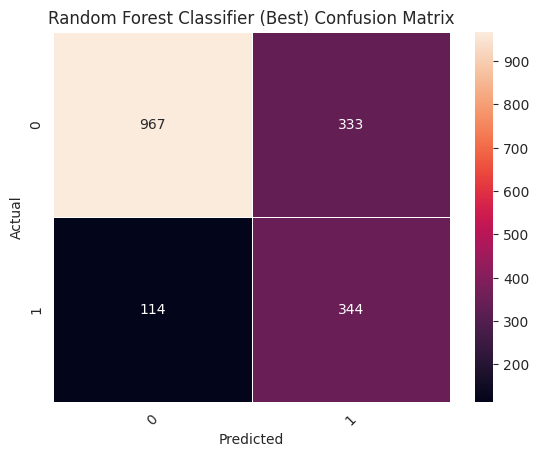

In [76]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

pipeline = Pipeline([
    ("smote", SMOTE(random_state=42)),
    ("random_forest", RandomForestClassifier(random_state=42)),
])

# Parameter distributions for Random Forest + SMOTE
param_dist = {
    "smote__sampling_strategy": np.linspace(0.4, 1.0, 8),  # 0.4 to 1.0 ratios
    "random_forest__n_estimators": [100, 200, 500, 1000],        # number of trees
    "random_forest__max_depth": [None, 5, 8, 10, 12],     # tree depth
    "random_forest__min_samples_split": [2, 5, 10, 20, 50, 100],        # min split
    "random_forest__min_samples_leaf": [1, 2, 4, 10, 20],          # min leaf size
    "random_forest__max_features": ["sqrt", "log2"]        # feature selection
}

# Randomized search
search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_dist,
    n_iter=20,               # test 20 random combos
    scoring="recall",        # since you care about FN
    cv=cv,
    random_state=42,
    n_jobs=-1,
    verbose=1
)

search.fit(X_train, y_train)

print("Best params:", search.best_params_)
print("Best CV recall:", search.best_score_)

best_model = search.best_estimator_
y_pred = best_model.predict(X_test)

print_metrics(y_test, y_pred, model_name="Random Forest Classifier (Best)")

In [62]:
from sklearn.linear_model import LogisticRegression
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

Logistic Regression best: {'smote__sampling_strategy': np.float64(1.0), 'log_reg__penalty': 'l2', 'log_reg__C': np.float64(0.001)}
Best recall: 0.7654211462797283
              precision    recall  f1-score   support

           0       0.89      0.76      0.82      1300
           1       0.52      0.74      0.61       458

    accuracy                           0.75      1758
   macro avg       0.71      0.75      0.72      1758
weighted avg       0.80      0.75      0.76      1758

-------------------------------------------------


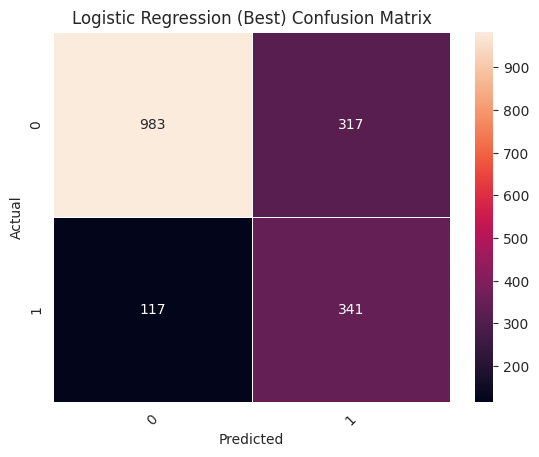

In [75]:
pipeline = Pipeline([
    ("smote", SMOTE(random_state=42)),
    ("log_reg", LogisticRegression(solver="liblinear", random_state=42))
])

param_dist = {
    "smote__sampling_strategy": np.linspace(0.4, 1.0, 8),
    "log_reg__C": np.logspace(-3, 3, 10),  # regularization strength
    "log_reg__penalty": ["l1", "l2"]
}

search = RandomizedSearchCV(
    pipeline, param_dist, n_iter=20, scoring="recall", cv=cv, n_jobs=-1, random_state=42
)
search.fit(X_train, y_train)

print("Logistic Regression best:", search.best_params_)
print("Best recall:", search.best_score_)

best_model = search.best_estimator_
y_pred = best_model.predict(X_test)

print_metrics(y_test, y_pred, model_name="Logistic Regression (Best)")


Fitting 5 folds for each of 20 candidates, totalling 100 fits


/home/bedirhan/Desktop/GitHub Projects/PythonProject/.venv/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


XGBoost best: {'xgb__subsample': 0.7, 'xgb__n_estimators': 300, 'xgb__max_depth': 3, 'xgb__learning_rate': 0.05, 'xgb__colsample_bytree': 0.7, 'smote__sampling_strategy': np.float64(1.0)}
Best recall: 0.7569205322908051
              precision    recall  f1-score   support

           0       0.89      0.75      0.81      1300
           1       0.51      0.73      0.60       458

    accuracy                           0.75      1758
   macro avg       0.70      0.74      0.71      1758
weighted avg       0.79      0.75      0.76      1758

-------------------------------------------------


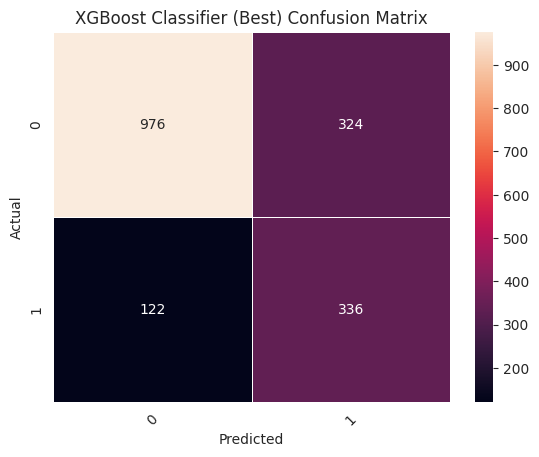

In [74]:
from xgboost import XGBClassifier

pipeline = Pipeline([
    ("smote", SMOTE(random_state=42)),
    ("xgb", XGBClassifier(eval_metric="logloss", random_state=42, n_jobs=-1))
])

param_dist = {
    "smote__sampling_strategy": np.linspace(0.4, 1.0, 7),
    "xgb__n_estimators": [100, 300, 500, 800],
    "xgb__max_depth": [3, 5, 7, 9],
    "xgb__learning_rate": [0.01, 0.05, 0.1, 0.2],
    "xgb__subsample": [0.7, 0.8, 1.0],
    "xgb__colsample_bytree": [0.7, 0.8, 1.0],
}

# stratified CV
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# randomized search
search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_dist,
    n_iter=20,
    scoring="recall",
    cv=cv,
    random_state=42,
    n_jobs=-1,
    verbose=1,
)

# fit
search.fit(X_train, y_train)


print("XGBoost best:", search.best_params_)
print("Best recall:", search.best_score_)

best_model = search.best_estimator_
y_pred = best_model.predict(X_test)

print_metrics(y_test, y_pred, model_name="XGBoost Classifier (Best)")

Fitting 5 folds for each of 20 candidates, totalling 100 fits


/home/bedirhan/Desktop/GitHub Projects/PythonProject/.venv/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


CatBoost best: {'smote__sampling_strategy': np.float64(0.9142857142857143), 'cat__learning_rate': 0.01, 'cat__l2_leaf_reg': 7, 'cat__iterations': 500, 'cat__depth': 4}
Best recall: 0.7675563240859083
              precision    recall  f1-score   support

           0       0.90      0.75      0.82      1300
           1       0.52      0.76      0.61       458

    accuracy                           0.75      1758
   macro avg       0.71      0.75      0.71      1758
weighted avg       0.80      0.75      0.76      1758

-------------------------------------------------


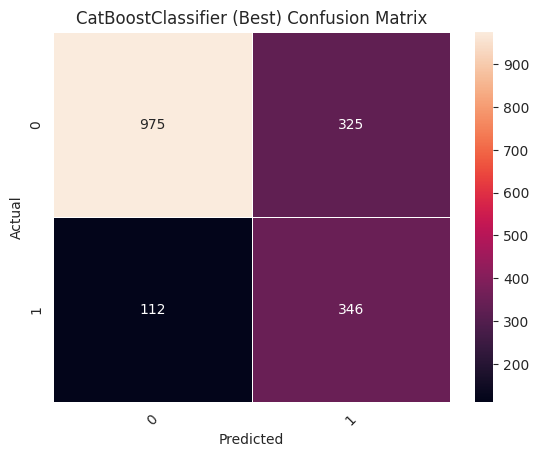

In [73]:
from catboost import CatBoostClassifier

pipeline = Pipeline([
    ("smote", SMOTE(random_state=42)),
    ("cat", CatBoostClassifier(verbose=0, random_state=42))
])

param_dist = {
    "smote__sampling_strategy": np.linspace(0.4, 1.0, 8),
    "cat__iterations": [200, 500, 1000],
    "cat__depth": [4, 6, 8, 10],
    "cat__learning_rate": [0.01, 0.05, 0.1],
    "cat__l2_leaf_reg": [1, 3, 5, 7]
}

search = RandomizedSearchCV(
    pipeline, param_dist, n_iter=20, scoring="recall", cv=cv,
    n_jobs=-1, random_state=42, verbose=1
)
search.fit(X_train, y_train)

print("CatBoost best:", search.best_params_)
print("Best recall:", search.best_score_)

best_model = search.best_estimator_
y_pred = best_model.predict(X_test)

print_metrics(y_test, y_pred, model_name="CatBoostClassifier (Best)")


Fitting 5 folds for each of 20 candidates, totalling 100 fits
SVC best: {'svc__kernel': 'rbf', 'svc__gamma': 'scale', 'svc__C': 0.1, 'smote__sampling_strategy': np.float64(1.0)}
Best recall: 0.759038167556324
              precision    recall  f1-score   support

           0       0.90      0.75      0.82      1300
           1       0.51      0.75      0.61       458

    accuracy                           0.75      1758
   macro avg       0.71      0.75      0.71      1758
weighted avg       0.80      0.75      0.76      1758

-------------------------------------------------


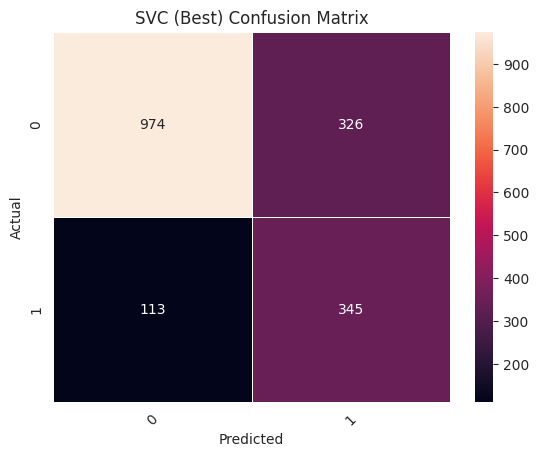

In [72]:
from sklearn.svm import SVC

pipeline = Pipeline([
    ("smote", SMOTE(random_state=42)),
    ("svc", SVC(probability=True, random_state=42))
])

param_dist = {
    "smote__sampling_strategy": np.linspace(0.4, 1.0, 8),
    "svc__C": [0.1, 1, 10],
    "svc__kernel": ["linear", "rbf"],
    "svc__gamma": ["scale", "auto"]
}

search = RandomizedSearchCV(
    pipeline, param_dist, n_iter=20, scoring="recall", cv=cv,
    n_jobs=-1, random_state=42, verbose=1
)
search.fit(X_train, y_train)

print("SVC best:", search.best_params_)
print("Best recall:", search.best_score_)

best_model = search.best_estimator_
y_pred = best_model.predict(X_test)

print_metrics(y_test, y_pred, model_name="SVC (Best)")


Fitting 5 folds for each of 20 candidates, totalling 100 fits
GradientBoosting best: {'smote__sampling_strategy': np.float64(1.0), 'gb__n_estimators': 500, 'gb__max_depth': 3, 'gb__learning_rate': 0.01}
Best recall: 0.7803022329148185
              precision    recall  f1-score   support

           0       0.89      0.74      0.81      1300
           1       0.50      0.75      0.60       458

    accuracy                           0.74      1758
   macro avg       0.70      0.74      0.70      1758
weighted avg       0.79      0.74      0.75      1758

-------------------------------------------------


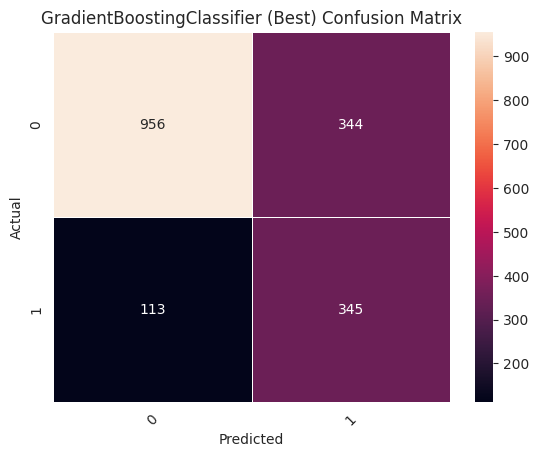

In [71]:
from sklearn.ensemble import GradientBoostingClassifier

pipeline = Pipeline([
    ("smote", SMOTE(random_state=42)),
    ("gb", GradientBoostingClassifier(random_state=42))
])

param_dist = {
    "smote__sampling_strategy": np.linspace(0.4, 1.0, 8),
    "gb__n_estimators": [200, 500, 1000],
    "gb__learning_rate": [0.01, 0.05, 0.1],
    "gb__max_depth": [3, 5, 7]
}

search = RandomizedSearchCV(
    pipeline, param_dist, n_iter=20, scoring="recall", cv=cv,
    n_jobs=-1, random_state=42, verbose=1
)
search.fit(X_train, y_train)

print("GradientBoosting best:", search.best_params_)
print("Best recall:", search.best_score_)

best_model = search.best_estimator_
y_pred = best_model.predict(X_test)

print_metrics(y_test, y_pred, model_name="GradientBoostingClassifier (Best)")
